# 感知器笔记
## 感知机模型
定义2.1（感知机）假设输入空间（特征空间）是$x \in R^n$,输出空间是$\mathcal{Y}=\{+1,-1\}$
$$
\begin{equation}
f(x)=sign(w\cdot x+b)
\end{equation}
$$
$$
\begin{equation}
sign(x)=
\begin{cases}
+1, & x \ge 0 \\
-1, & x \lt 0
\end{cases}
\end{equation}
$$

## 感知机学习策略
### 数据的线性可分析
### 感知机学习策略
假设超平面$S$的误分类点集合为M，那么所有误分类点到超平面S的总距离为
$$
-\frac{1}{\Vert w \Vert}\sum_{x_i \in M}y_i(w \cdot x_i+b)
$$
感知机$sign(w\cdot x+b)$的损失函数定义为
$$
L(w,b)=-\sum_{x_i \in M}y_i(w \cdot x_i+b)
$$
### 感知器学习算法
随机梯度下降法（stochastic gradient descent)
输入：训练数据集$T=\{(x_1,y_1),(x_2,y_2),\ldots,(x_N,y_N)\}$，其中$\mathcal{Y}=\{-1,+1\}$,学习率$\eta(0\lt \eta \le 1)$  
输出：$w,b$;感知机模型$f(x)=sign(w\cdot x+b)$
1. 选取初值$w_0,b_0$
2. 在训练集中选取数据$(x_i,y_i)$
3. 如果$y_i(w\cdot x_i+b) \le 0$
4. 转至第2步，直到训练集中没有误分类点。
$$
w \gets w+\eta y_i x_i \\
b \gets b+\eta y_i
$$

直观感觉为什么可行？不妨设$(x_i,y_i)$为误分类点
$$
\begin{eqnarray*}
y_i(w_{t+1}x_i+b_{t+1}) & = &y_i((w_t+\eta y_i x_i)x_i+b_t+\eta y_i) \\
 & = &y_i(w_t+b_t)+\eta y_i^2 x_i^2+ \eta y_i^2 \\
 & \ge & y_i(w_t+b_t)
\end{eqnarray*}
$$
可见$y_i(w_{t+1}x_i+b_{t+1})$是递增的，最终会大于0，即正确分类。

In [6]:
def targetFunc(x):
    return -2*x[0]+x[1]+80.5
a=[1,3]
print targetFunc(a)

81.5


In [13]:
import random
X1=[]
X2=[]
Y=[]
C=[]
S=[]
for i in range(20):
    x1=random.randint(0,100)
    x2=random.randint(0,100)
    y=targetFunc([x1,x2])
    if y >0 :
        X1.append(x1)
        X2.append(x2)
        Y.append(1)
        C.append('b')
        S.append('o')
    elif y<0:
        X1.append(x1)
        X2.append(x2)
        Y.append(-1)
        C.append('r')
        S.append('x')
print X1
print X2
print Y
    

[24, 61, 68, 29, 97, 100, 97, 30, 17, 25, 21, 44, 29, 28, 64, 11, 29, 28, 40, 37]
[55, 9, 87, 46, 32, 29, 77, 93, 17, 95, 60, 1, 87, 68, 96, 76, 44, 56, 24, 60]
[1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1]


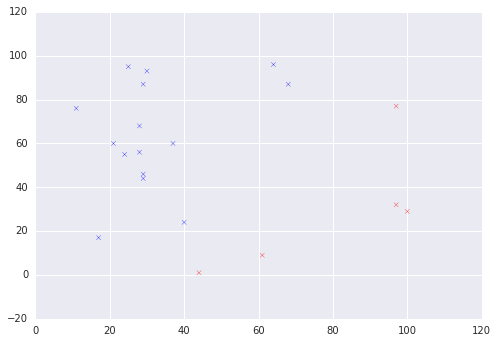

In [28]:
%matplotlib inline
import pylab as plt
import seaborn

seaborn.set()
plt.scatter(X1,X2,c=C,marker='x')
plt.show()

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2. ]


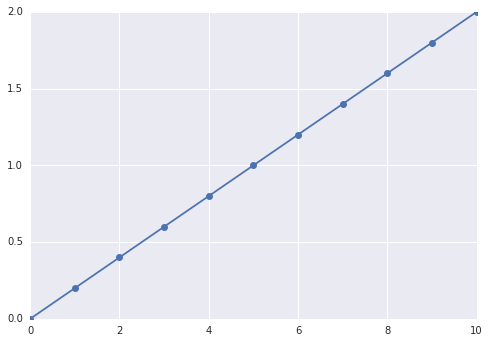

In [29]:
import numpy as np
x=np.linspace(0,2,11)
print x
plt.plot(x,'o-')
plt.show()

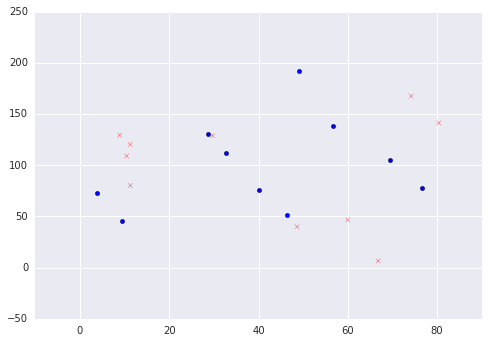

In [36]:
ra=np.random.uniform(0,100,10)
rb=np.random.uniform(0,200,10)
ba=np.random.uniform(0,100,10)
bb=np.random.uniform(0,200,10)
c=['r' for i in range(10)]
plt.scatter(ra,rb,marker='o')
plt.scatter(ba,bb,marker='x',c=c)
plt.show()